# Exploratory Data Analysis on Swiggy Varanasi Restaurants Dataset

Download dataset here - https://www.kaggle.com/datasets/chinmayshanbhag/swiggy-varanasi-restaurants

**Importing the Libraries**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [155]:
sw = pd.read_csv('Swiggy_Varanasi.csv')
sw.head()

,Restaurant Name,Category,Rating,Cost for two,Area,Locality,Address,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),"North Indian,Biryani,Mughlai,Chinese",3.8,350,Nagwa,Sunderpur,"1st Floor , Near Life Line Hospital, Brij Encl...",False,0
1,Burger King,"American,Fast Food",4.1,350,Sigra,Shastri Nagar,"Ground Floor and First Floor,Tulsi Complex,C-1...",False,0
2,McDonald's,American,4.0,400,Varanasi Cantonment,JHV Mall,"UP Varanasi JHV Mall, Shop No. 19-21/G, JHV M...",False,0
3,Aman E Khas,"Mughlai,Biryani,North Indian,Chinese",3.9,350,Bhelupur,Bhelupur,"Boradway Hotel, Near IP Vijay Mall, Bhelupur, ...",False,0
4,Mahadev momo and coffee corner,Chinese,NaN,200,Sigra,Sigra,"C28/141-k-p, teliyabagh, varanasi nagar nigam ...",False,0


In [156]:
sw.shape

(667, 9)

In [157]:
sw.columns

Index(['Restaurant Name', 'Category', 'Rating', 'Cost for two', 'Area',
       'Locality', 'Address', 'Veg', 'Long Distance Delivery'],
      dtype='object')

**Summary statistics of the dataset**

In [158]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         667 non-null    object 
 1   Category                667 non-null    object 
 2   Rating                  269 non-null    float64
 3   Cost for two            667 non-null    int64  
 4   Area                    667 non-null    object 
 5   Locality                667 non-null    object 
 6   Address                 667 non-null    object 
 7   Veg                     667 non-null    bool   
 8   Long Distance Delivery  667 non-null    int64  
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 42.5+ KB


In [159]:
# We can see that the Rating column has most amount of missing values
# Next we look at description of the dataset
sw.describe()

,Rating,Cost for two,Long Distance Delivery
count,269.000000,667.000000,667.000000
mean,3.658364,287.698651,0.226387
std,0.525306,124.776259,0.418806
min,1.200000,2.000000,0.000000
25%,3.500000,200.000000,0.000000
50%,3.800000,250.000000,0.000000
75%,4.000000,350.000000,0.000000
max,4.600000,1400.000000,1.000000


So, from above, we can see that the average cost for two people in any restaurant is atleast 288 rupees.

In [160]:
# Let's check for any duplicated values
sw.duplicated().any()

False

In [161]:
# Checking for missing values
sw.isnull().sum()

Restaurant Name             0
Category                    0
Rating                    398
Cost for two                0
Area                        0
Locality                    0
Address                     0
Veg                         0
Long Distance Delivery      0
dtype: int64

In [162]:
# We will fill the missing values in 'Rating' column with mean rating
import math
mean_rating = round(sw.Rating.mean(),1)
mean_rating

3.7

In [163]:
sw['Rating'] = sw['Rating'].fillna(mean_rating)
sw.Rating.isnull().sum()

0

In [164]:
## Drop all unnecessary columns
sw = sw.drop(['Address'],axis=1)
sw.head()

,Restaurant Name,Category,Rating,Cost for two,Area,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),"North Indian,Biryani,Mughlai,Chinese",3.8,350,Nagwa,Sunderpur,False,0
1,Burger King,"American,Fast Food",4.1,350,Sigra,Shastri Nagar,False,0
2,McDonald's,American,4.0,400,Varanasi Cantonment,JHV Mall,False,0
3,Aman E Khas,"Mughlai,Biryani,North Indian,Chinese",3.9,350,Bhelupur,Bhelupur,False,0
4,Mahadev momo and coffee corner,Chinese,3.7,200,Sigra,Sigra,False,0


In [165]:
sw.dtypes

Restaurant Name            object
Category                   object
Rating                    float64
Cost for two                int64
Area                       object
Locality                   object
Veg                          bool
Long Distance Delivery      int64
dtype: object

In [166]:
#Replace 0 by No and 1 by Yes in Long Distance Delivery column
sw['Long Distance Delivery'] = sw['Long Distance Delivery'].replace(0, 'No')
sw['Long Distance Delivery'] = sw['Long Distance Delivery'].replace(1, 'Yes')
sw

,Restaurant Name,Category,Rating,Cost for two,Area,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),"North Indian,Biryani,Mughlai,Chinese",3.8,350,Nagwa,Sunderpur,False,No
1,Burger King,"American,Fast Food",4.1,350,Sigra,Shastri Nagar,False,No
2,McDonald's,American,4.0,400,Varanasi Cantonment,JHV Mall,False,No
3,Aman E Khas,"Mughlai,Biryani,North Indian,Chinese",3.9,350,Bhelupur,Bhelupur,False,No
4,Mahadev momo and coffee corner,Chinese,3.7,200,Sigra,Sigra,False,No
...,...,...,...,...,...,...,...,...
662,The Star Bakery,Bakery,3.7,200,IIT,IIT,True,Yes
663,The Live Bakery,Bakery,3.7,200,IIT,IIT,True,Yes
664,GO GREEN BAKERY,Bakery,3.7,200,IIT,IIT,True,Yes
665,Fresh Cake,Bakery,3.7,200,IIT,IIT,True,Yes


In [167]:
sw['Area'].unique()

array(['Nagwa', 'Sigra', 'Varanasi Cantonment', 'Bhelupur', 'Jahumandi',
       'Nadesar', 'Maheshpur', 'Mahmoorganj', 'Chaukaghat', 'Shivpurwa',
       'Ramapura Luxa', 'Chetganj', 'Lanka', 'sigra', 'Shivpur',
       'Teliyabag', 'Jaitpura', 'IIT', 'Kakarmata', 'Rathyatra ',
       'Manduwadih', 'MADHAULI', 'Lehertara Industrial Estate',
       'Kailashpuri Colony', 'Golghar', 'siigra', 'Sikraul', 'Hamrautia',
       'Harha', 'Dig Colony', 'Khajuri Colony', 'Golghar kachehri',
       'sigra varanasi', 'Ram katora piplani katra road ', 'Kakarmatta',
       'Naibasti', 'New colony kakarmatta, sunderpur', 'Kabir Chaura',
       'Sidhgiribagh', 'Bhelupur Varanasi', 'Luxa Road',
       'luxa,Ramapura ,Varanasi', 'kachahri', 'Kotwali', 'Godowlia',
       'Ghasi Tola', 'Varanasi', 'Vda Colony', 'Bhullanpur', 'Pandeypur',
       'Mahavir mandir orderlybazar', 'Newada', 'Chotta Chuppepur',
       'Bangali Tola', 'Jivan nagar collony, Bajardiha', 'Bhojuveer',
       'Bisweshwarganj', 'Karaundi'

In [168]:
sw['Locality'].unique()

array(['Sunderpur', 'Shastri Nagar', 'JHV Mall', 'Bhelupur', 'Sigra',
       'Rathyatra', 'Nadesar', 'Mahmoorganj', 'Lanka', 'Varanasi',
       'Chetganj', 'Durgakund', 'Celestial Building', 'sigra',
       'Sigra Mahmoorganj Rd', 'IIT', 'Chhawani Cantonment',
       'Dr. Anand Xray and ultrasound', 'Ramkatora', 'JHV MALL VARANASI',
       'Pandeypur, Varanasi', 'OPP TRUE VALUE SHOP', 'Kasturba Nagar',
       'Ashapur', 'Lohta road', 'luxa', 'Golghar, Nadeshar',
       'mahmoorganj', 'Kachahari', 'Kakarmatta', 'Bhojuveer', 'pandeypur',
       'sigra varanasi', 'Pandeypur', 'New colony kakarmatta, sunderpur',
       'Godowlia', 'Bhelupur Varanasi', 'Bansphatak',
       'luxa,Ramapura ,Varanasi', 'Kachahri', 'Sarainandan Khojwan',
       'Kanchanpur', 'bhojubeer', 'Near I P Vijay Mall', 'Orderly Bazaar',
       'Nevada Sundarpur', 'Jivan nagar collony, Bajardiha',
       'Near Kal bhairo temple', 'PANDEYPUR', 'karudi', 'Pahariya',
       'lanka', 'Lanka, BHU Road', 'Malviya Kunj, lanka',

In [169]:
# Area and Location are both pointing to same result, so we will keep only one : Location
sw = sw.drop(['Area'],axis=1)

In [170]:
sw.head()

,Restaurant Name,Category,Rating,Cost for two,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),"North Indian,Biryani,Mughlai,Chinese",3.8,350,Sunderpur,False,No
1,Burger King,"American,Fast Food",4.1,350,Shastri Nagar,False,No
2,McDonald's,American,4.0,400,JHV Mall,False,No
3,Aman E Khas,"Mughlai,Biryani,North Indian,Chinese",3.9,350,Bhelupur,False,No
4,Mahadev momo and coffee corner,Chinese,3.7,200,Sigra,False,No


In [171]:
sw['Cost for two'].unique()

array([ 350,  400,  200,  250,  300,  500,  120,  600,  700,  550,  100,
        450,  150,  280,  149,   99,  750,  295, 1100,  800,  498,  380,
        360,   50,    2,  199, 1400,  325,   90], dtype=int64)

In [172]:
sw['Locality'].value_counts()

Sigra                               154
Lanka                               148
Nadesar                             133
IIT                                 100
Bhelupur                             23
Mahmoorganj                          20
Chetganj                             12
Ashapur                               7
Godowlia                              5
Bhojuveer                             4
Pandeypur                             4
Sunderpur                             3
pandeypur                             2
Babatpur                              2
sigra                                 2
Sigra Mahmoorganj Rd                  2
Durgakund                             2
Varanasi                              2
JHV Mall                              2
Kanchanpur                            1
Jivan nagar collony, Bajardiha        1
bhojubeer                             1
Sarainandan Khojwan                   1
Near I P Vijay Mall                   1
Orderly Bazaar                        1


In [173]:
# Since there are many localities having less than 10 restaurants, so we will group them as 'others'
Locality = sw['Locality'].value_counts(ascending = True)

locality_lessthan50 = Locality[Locality<50]

def handle_locality(value):
    if(value in locality_lessthan50):
        return 'others'
    else:
        return value

sw['Locality'] = sw['Locality'].apply(handle_locality)
sw['Locality'].value_counts()

Sigra      154
Lanka      148
Nadesar    133
others     132
IIT        100
Name: Locality, dtype: int64

In [174]:
Category = sw['Category'].value_counts()

Category_lessthan10 = Category[Category<=10]

def handle_category(value):
    if(value in Category_lessthan10):
        return 'Others'
    else:
        return value
    
sw['Category'] = sw['Category'].apply(handle_category)
sw['Category'].value_counts()

Others          554
Bakery           40
Indian           25
Chinese          20
North Indian     15
Pizzas           13
Name: Category, dtype: int64

In [175]:
sw.head()

,Restaurant Name,Category,Rating,Cost for two,Locality,Veg,Long Distance Delivery
0,Singh's Delight Restaurant(Sunderpur),Others,3.8,350,others,False,No
1,Burger King,Others,4.1,350,others,False,No
2,McDonald's,Others,4.0,400,others,False,No
3,Aman E Khas,Others,3.9,350,others,False,No
4,Mahadev momo and coffee corner,Chinese,3.7,200,Sigra,False,No


# Data Visualization

Text(0.5, 1.0, 'Number of restaurants near every Locality')

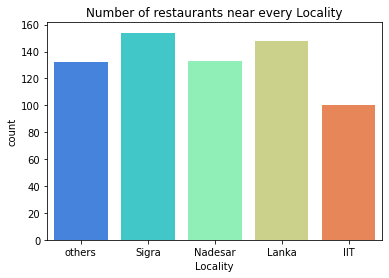

In [176]:
# Countplot of various locations
sns.countplot(sw['Locality'], palette='rainbow')
plt.title('Number of restaurants near every Locality')

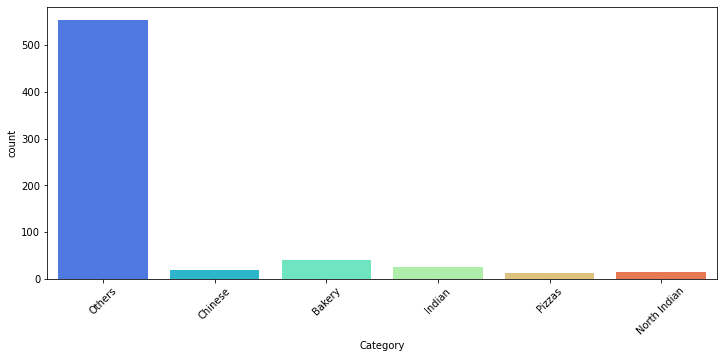

In [177]:
# Countplot of different category of food available
plt.figure(figsize=(12,5))
ax=sns.countplot(sw['Category'], palette='rainbow')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='Long Distance Delivery', ylabel='count'>

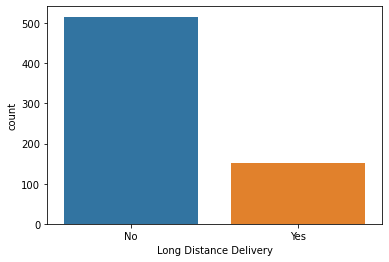

In [178]:
# Most restaurants do not deliver long distance
sns.countplot('Long Distance Delivery', data = sw)

<AxesSubplot:xlabel='Long Distance Delivery', ylabel='Cost for two'>

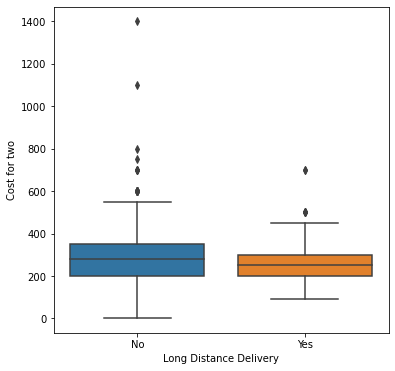

In [179]:
# Visualizing long distance delivery vs Cost for two
plt.figure(figsize=(6,6))
sns.boxplot(x='Long Distance Delivery', y='Cost for two', data = sw)

In [180]:
# Visualizing choice for food (veg/non-veg) based on location
df1 = sw.groupby(['Locality','Veg'])['Restaurant Name'].count()
df1.to_csv('location_veg.csv')
df1 = pd.read_csv('location_veg.csv')
df1 = pd.pivot_table(df1, values=None, index=['Locality'], columns=['Veg'], fill_value=0, aggfunc=np.sum)
df1

Restaurant Name     
Veg                False True
Locality                     
IIT                   79   21
Lanka                118   30
Nadesar              104   29
Sigra                100   54
others                92   40

Most Vegetarian Restaurants can be found in Sigra

<AxesSubplot:xlabel='Locality'>

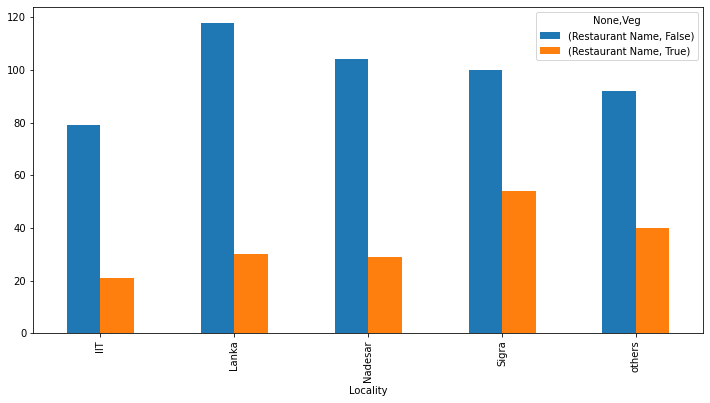

In [181]:
df1.plot(kind='bar',figsize=(12,6))

In [182]:
# Visualizing long distance delivery, location wise
df2 = sw.groupby(['Locality','Long Distance Delivery'])['Restaurant Name'].count()
df2.to_csv('location_long_delivery.csv')
df2 = pd.read_csv('location_long_delivery.csv')
df2 = pd.pivot_table(df2, values=None, index=['Locality'], columns=['Long Distance Delivery'], fill_value=0, aggfunc=np.sum)
df2

Restaurant Name    
Long Distance Delivery              No Yes
Locality                                  
IIT                                 75  25
Lanka                               92  56
Nadesar                             89  44
Sigra                              151   3
others                             109  23

<AxesSubplot:xlabel='Locality'>

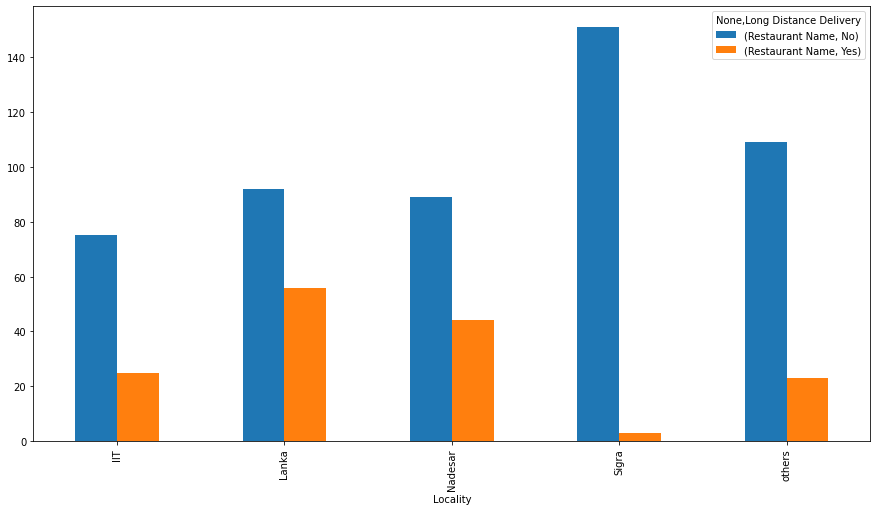

In [183]:
df2.plot(kind='bar',figsize=(15,8))

In [184]:
# Grouping Type of restaurants locality wise
df3 = sw.groupby(['Locality','Category'])['Restaurant Name'].count()
df3.to_csv('Location_category.csv')
df3 = pd.read_csv('Location_category.csv')
df3 = pd.pivot_table(df3, values=None, index=['Locality'], columns=['Category'], fill_value=0, aggfunc=np.sum)
df3

Restaurant Name                                          
Category          Bakery Chinese Indian North Indian Others Pizzas
Locality                                                          
IIT                   12       4      5            3     76      0
Lanka                  4       7      3            7    124      3
Nadesar               14       5      4            2    106      2
Sigra                  6       3     11            2    125      7
others                 4       1      2            1    123      1

<AxesSubplot:xlabel='Locality'>

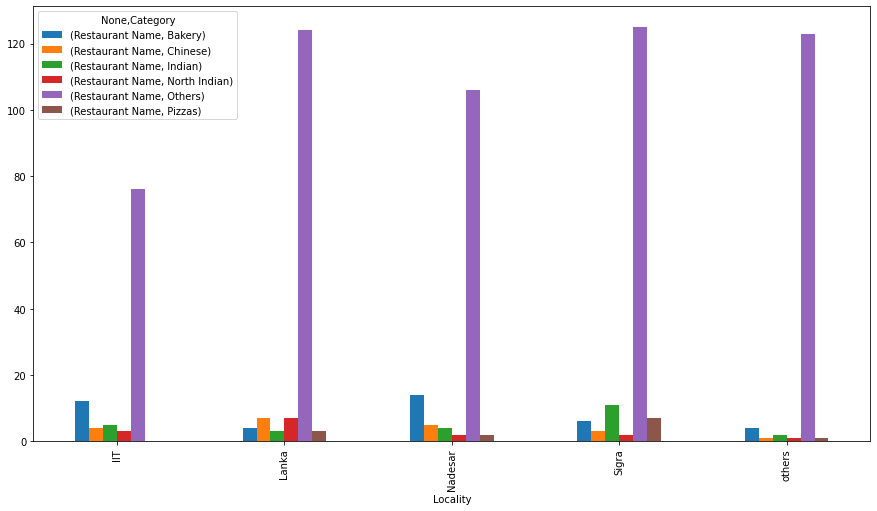

In [185]:
df3.plot(kind='bar', figsize=(15,8))

In [186]:
df5 = sw.groupby(['Locality','Rating'])['Restaurant Name'].count()
df5.to_csv('location_rating.csv')
df5 = pd.read_csv('location_rating.csv')
df5 = pd.pivot_table(df5, values=None, index=['Locality'], columns=['Rating'], fill_value=0, aggfunc=np.sum)
df5

Restaurant Name                                      ...           \
Rating               1.2 1.3 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6  ... 3.6  3.7   
Locality                                                      ...            
IIT                    1   0   0   0   0   1   1   1   3   1  ...   1   75   
Lanka                  0   1   0   0   0   0   1   0   1   0  ...   7  104   
Nadesar                0   0   0   0   1   0   0   0   1   0  ...   1   93   
Sigra                  0   0   1   0   0   0   0   0   0   0  ...   7  113   
others                 0   0   0   1   0   0   0   1   1   0  ...   5   43   

                                          
Rating   3.8 3.9 4.0 4.1 4.2 4.3 4.4 4.6  
Locality                                  
IIT        1   1   4   0   1   0   0   0  
Lanka      2   8   6   5   2   2   0   0  
Nadesar    5   1   4   5   4   2   2   1  
Sigra      4   4   7   3   0   1   0   0  
others    11  17  17   8   2   2   5   1  

[5 rows x 29 columns]

<AxesSubplot:xlabel='Locality'>

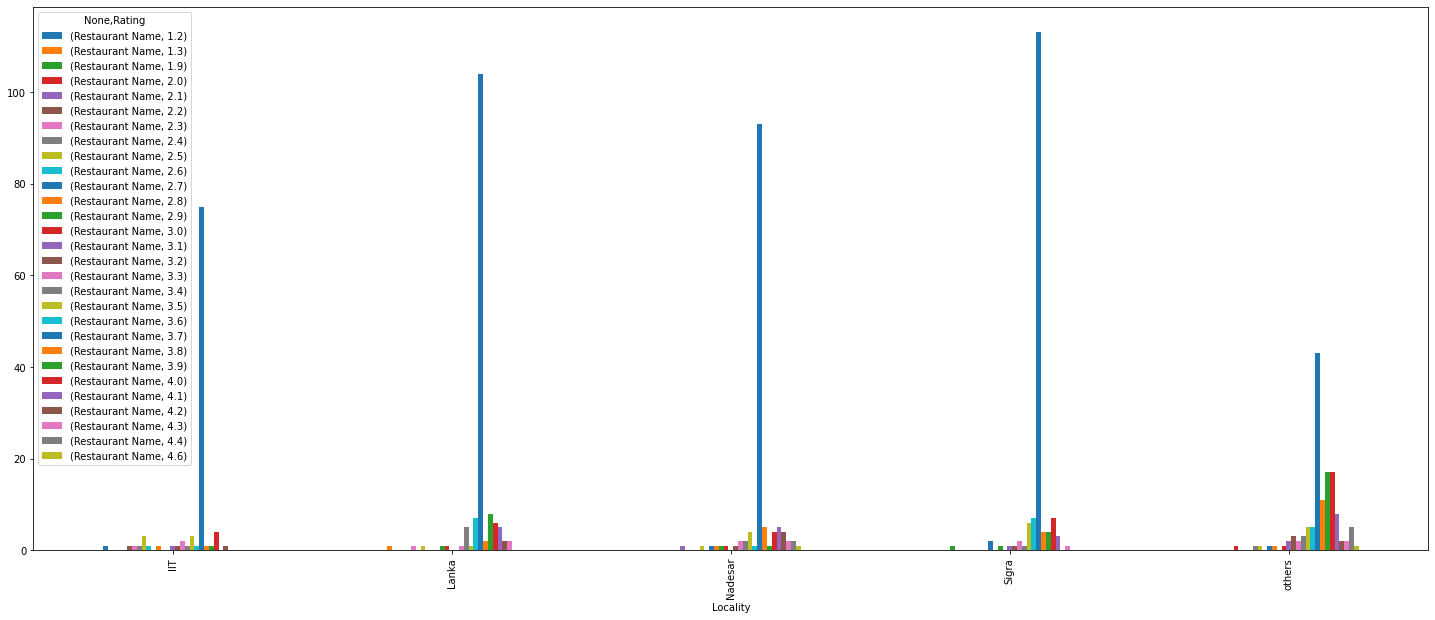

In [187]:
df5.plot(kind='bar', figsize=(25,10))

# Conclusion

* We infer that that number of Vegetarian Restaurants in any Locality are much lesser than number of restaurants offering Non-veg. 
* In all the localities, restaurants delivering long distance are few compared to those delivering long distance.
* There is no place near IIT that offers only pizzas. So, if a person wants to open a restaurant near IIT, they can consider opening only pizza restaurant.